# Plots for Figure S6

In [1]:
###Load Packages
#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style("ticks")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Color palette for plots
four_palette = ["darkgreen", "tomato", "steelblue", "orange"]
two_palette = ["steelblue", "orange"]

In [10]:
#path to the data
path = "../../"

In [11]:
#Function to read polyA tab del files
def read_polyA_reads(file, min_read_count, sample_name, replicate):
    df = pd.read_csv(file, delimiter='\t')
    df = df.loc[df['tail_len'] >= min_read_count]
    df['Sample'] = sample_name
    df['Replicate'] = replicate
    return(df)

In [12]:
#Read in dfs for all reads
min_A_count = 10

h112_1 = read_polyA_reads(path + 'results/polyA_len/EV.R1_polyA.txt', min_A_count, "EV", "1")
h112_2 = read_polyA_reads(path + 'results/polyA_len/EV.R2_polyA.txt', min_A_count, "EV", "2")

h113_1 = read_polyA_reads(path + 'results/polyA_len/WT.R1_polyA.txt', min_A_count, "WT", "1")
h113_2 = read_polyA_reads(path + 'results/polyA_len/WT.R2_polyA.txt', min_A_count, "WT", "2")

h115_1 = read_polyA_reads(path + 'results/polyA_len/4SA.R1_polyA.txt', min_A_count, "4SA", "1")
h115_2 = read_polyA_reads(path + 'results/polyA_len/4SA.R2_polyA.txt', min_A_count, "4SA", "2")

h117_1 = read_polyA_reads(path + 'results/polyA_len/4SD.R1_polyA.txt', min_A_count, "4SD", "1")
h117_2 = read_polyA_reads(path + 'results/polyA_len/4SD.R2_polyA.txt', min_A_count, "4SD", "2")

#Path to gene types df (from gtf)
gene_types = pd.read_csv(path + "config/gene_types_df.tsv", sep = "\t")

#Combine replicates and intersect with gene names
all_reads = pd.concat([h112_1, h112_2, h113_1, h113_2, h115_1, h115_2, h117_1, h117_2], ignore_index = True)
all_reads["gene_id"] = all_reads["gene_id"].str.split(".").str[0]
all_reads = all_reads.merge(gene_types, on = 'gene_id')

In [13]:
#Function to read polyA tab del files AFTER running get_tails.py
def read_polyA_gene(file, sample_name, replicate):
    df = pd.read_csv(file, delimiter='\t')
    df['Sample'] = sample_name
    df['Replicate'] = replicate
    return(df)

In [14]:
#Read in dfs for gene tail metrics
per_gene_h112_1 = read_polyA_gene(path + "results/polyA_len/per_gene/EV.R1_per_gene.tsv", "EV", "1")
per_gene_h112_2 = read_polyA_gene(path + "results/polyA_len/per_gene/EV.R2_per_gene.tsv", "EV", "2")

per_gene_h113_1 = read_polyA_gene(path + "results/polyA_len/per_gene/WT.R1_per_gene.tsv", "WT", "1")
per_gene_h113_2 = read_polyA_gene(path + "results/polyA_len/per_gene/WT.R2_per_gene.tsv", "WT", "2")

per_gene_h115_1 = read_polyA_gene(path + "results/polyA_len/per_gene/4SA.R1_per_gene.tsv", "4SA", "1")
per_gene_h115_2 = read_polyA_gene(path + "results/polyA_len/per_gene/4SA.R2_per_gene.tsv", "4SA", "2")

per_gene_h117_1 = read_polyA_gene(path + "results/polyA_len/per_gene/4SD.R1_per_gene.tsv", "4SD", "1")
per_gene_h117_2 = read_polyA_gene(path + "results/polyA_len/per_gene/4SD.R2_per_gene.tsv", "4SD", "2")

#Concatenate samples and conditions into single dataframes
df_gene = pd.concat([per_gene_h112_1, per_gene_h112_2, per_gene_h113_1, per_gene_h113_2, per_gene_h115_1, per_gene_h115_2, per_gene_h117_1, per_gene_h117_2])

df_gene = df_gene.loc[df_gene['median'] >= 10]
df_gene.rename(columns={"Unnamed: 0":'gene_id'}, inplace=True)

df_gene.gene_id = df_gene.gene_id.str.split(".").str[0]
#Path to gene types df (from gtf)
gene_types = pd.read_csv("/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/config/gene_types_df.tsv", sep = "\t")

#Combine replicates and intersect with gene names
df_gene = df_gene.merge(gene_types, on = 'gene_id')

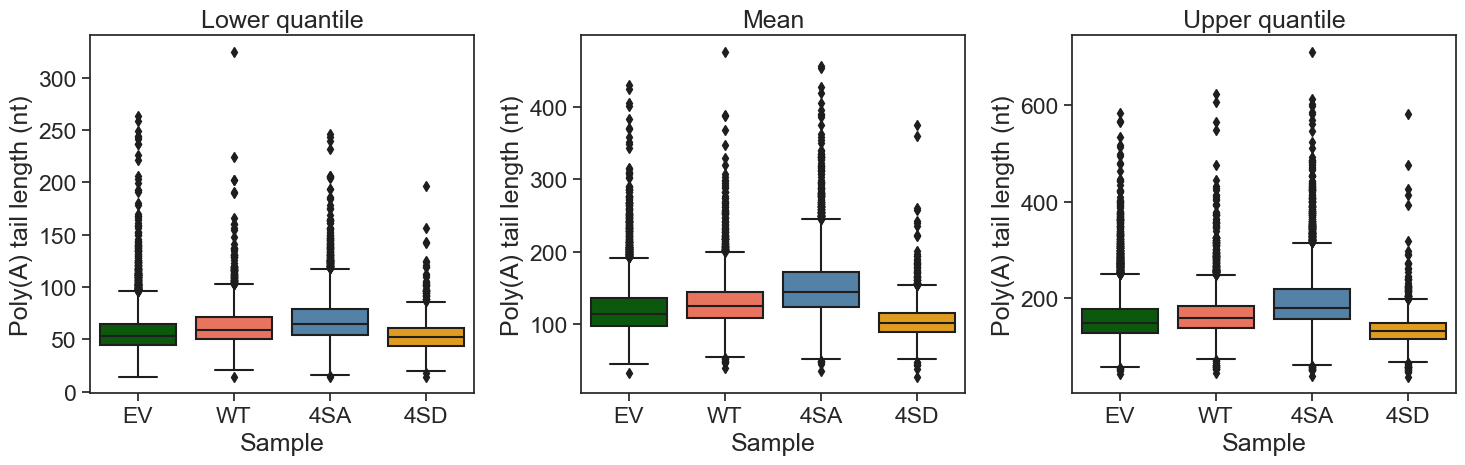

In [17]:
#Compare tail length distributions across conditions - MEDIAN
plot_samps = ["EV", "WT", "4SA", "4SD"]
plot_df = df_gene.loc[df_gene['Sample'].isin(plot_samps)]

fig, (ax1) = plt.subplots(1,3, figsize = (15, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

#plot
#Lower quantile (25 percent)
sns.boxplot(data=plot_df, x="Sample", y="quantile_25", 
             palette = four_palette, ax = ax1[0], hue_order = plot_samps, order = plot_samps 
             ).set(title = 'Lower quantile')

#Median
sns.boxplot(data=plot_df, x="Sample", y="mean", 
             palette = four_palette, ax = ax1[1], hue_order = plot_samps, order = plot_samps 
             ).set(title = 'Mean')

#Upper quantile (75 percent)
sns.boxplot(data=plot_df, x="Sample", y="quantile_75", 
             palette = four_palette, ax = ax1[2], hue_order = plot_samps, order = plot_samps 
             ).set(title = 'Upper quantile')

ax1[0].set_xlabel("Sample")
ax1[1].set_xlabel("Sample")
ax1[2].set_xlabel("Sample")

ax1[0].set_ylabel("Poly(A) tail length (nt)")
ax1[1].set_ylabel("Poly(A) tail length (nt)")
ax1[2].set_ylabel("Poly(A) tail length (nt)")

fig.tight_layout()

plt.show()

In [ ]:
#Make a list of correlation dfs and calculate correlation coefficients
corr_dfs = [df_gene.loc[(df_gene.Sample == "EV") & (df_gene.Replicate == "1")].merge(df_gene.loc[(df_gene.Sample == "EV") & (df_gene.Replicate == "2")], on = "gene_id"),
            df_gene.loc[(df_gene.Sample == "WT") & (df_gene.Replicate == "1")].merge(df_gene.loc[(df_gene.Sample == "WT") & (df_gene.Replicate == "2")], on = "gene_id"),
            df_gene.loc[(df_gene.Sample == "4SA") & (df_gene.Replicate == "1")].merge(df_gene.loc[(df_gene.Sample == "4SA") & (df_gene.Replicate == "2")], on = "gene_id"),
            df_gene.loc[(df_gene.Sample == "4SD") & (df_gene.Replicate == "1")].merge(df_gene.loc[(df_gene.Sample == "4SD") & (df_gene.Replicate == "2")], on = "gene_id")]
            
corr_info = []
for i in corr_dfs:
    x = i.median_x
    y = i.median_y
    res = stats.linregress(x, y)
    corr_info.append(res)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
#Print correlation info
for i in corr_info:
    print(i.rvalue)

0.7115660770307471
0.7046512143265299
0.6705970731427375
0.7102196215018414


/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_36946/2544287099.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = corr_dfs[0],
/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_36946/2544287099.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = corr_dfs[1],
/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_36946/2544287099.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = corr_dfs[2],
/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_36946/2544287099.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = corr_dfs[3],


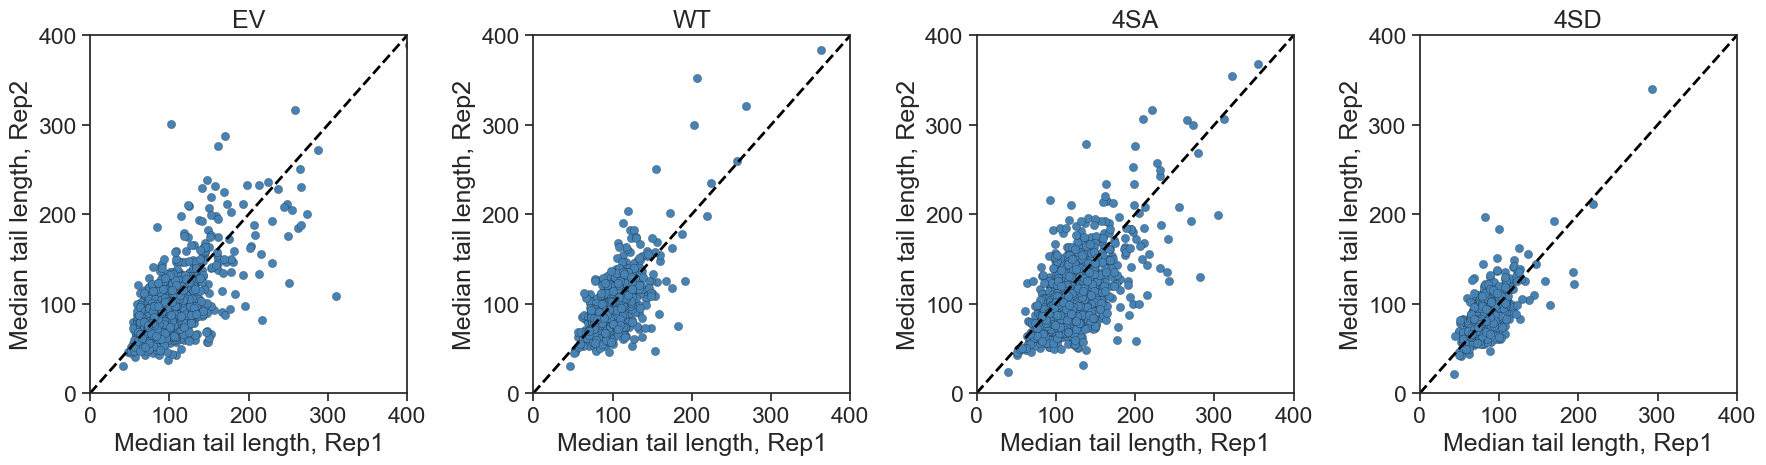

In [21]:
#Make scatterplots to look at correlation between replicates
#Compare tail length distributions across conditions - MEDIAN
fig, (ax) = plt.subplots(1,4, figsize = (18, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

#plot
#EV
sns.scatterplot(data = corr_dfs[0],
            x= "median_x", y = "median_y",
             palette = four_palette, ax = ax[0], color = "steelblue", edgecolor = "black", linewidth = 0.15
             ).set(title = 'EV')
# sns.lineplot(x = corr_dfs[0].median_x, y = corr_info[0].intercept + corr_info[0].slope*corr_dfs[0].median_x, color = 'black', linestyle = "--", linewidth = 2, ax = ax[0])
sns.lineplot(x = [0,400], y = [0,400], color = 'black', linestyle = "--", linewidth = 2, ax = ax[0])

#WT
sns.scatterplot(data = corr_dfs[1],
            x= "median_x", y = "median_y",
             palette = four_palette, ax = ax[1], color = "steelblue", edgecolor = "black", linewidth = 0.15
             ).set(title = 'WT')
sns.lineplot(x = [0,400], y = [0,400], color = 'black', linestyle = "--", linewidth = 2, ax = ax[1])

#4SA
sns.scatterplot(data = corr_dfs[2],
            x= "median_x", y = "median_y",
             palette = four_palette, ax = ax[2], color = "steelblue", edgecolor = "black", linewidth = 0.15
             ).set(title = '4SA')
sns.lineplot(x = [0,400], y = [0,400], color = 'black', linestyle = "--", linewidth = 2, ax = ax[2])

#4SD
sns.scatterplot(data = corr_dfs[3],
            x= "median_x", y = "median_y",
             palette = four_palette, ax = ax[3], color = "steelblue", edgecolor = "black", linewidth = 0.15
             ).set(title = '4SD')
sns.lineplot(x = [0,400], y = [0,400], color = 'black', linestyle = "--", linewidth = 2, ax = ax[3])

#Figure labels and limits
ax[0].set_xlim(0,400)
ax[0].set_ylim(0,400)
ax[0].set_xlabel("Median tail length, Rep1")
ax[0].set_ylabel("Median tail length, Rep2")

ax[1].set_xlim(0,400)
ax[1].set_ylim(0,400)
ax[1].set_xlabel("Median tail length, Rep1")
ax[1].set_ylabel("Median tail length, Rep2")

ax[2].set_xlim(0,400)
ax[2].set_ylim(0,400)
ax[2].set_xlabel("Median tail length, Rep1")
ax[2].set_ylabel("Median tail length, Rep2")

ax[3].set_xlim(0,400)
ax[3].set_ylim(0,400)
ax[3].set_xlabel("Median tail length, Rep1")
ax[3].set_ylabel("Median tail length, Rep2")

fig.tight_layout()

plt.show()

In [22]:
#Define a function to compare tail lengths per gene between two conditions
def compare_tail_lengths(df, c1, c2, min_reads=25):
    #select genes that are common between conditions
    c1_genes = df.loc[df.Sample == c1].gene_id
    common_genes = list(np.unique(df.loc[(df.Sample == c2) & df.gene_id.isin(c1_genes)].gene_id ))
    #calculate summary stats of each gene between conditions and test for statistical significance 
    per_gene_res_c1 = dict()
    per_gene_res_c2 = dict()
    reads_c1 = df.loc[df["Sample"] == c1]
    reads_c2 = df.loc[df["Sample"] == c2]
    for i in tqdm(np.unique(common_genes)):
        temp_c1 = reads_c1[reads_c1.gene_id == i]
        temp_c2 = reads_c2[reads_c2.gene_id == i]
        if (len(temp_c1) & len(temp_c2)) >= min_reads:
            per_gene_res_c1[i] = [np.mean(temp_c1.tail_len), np.median(temp_c1.tail_len), pearson_skew_2(temp_c1.tail_len), len(temp_c1.tail_len)]
            per_gene_res_c2[i] = [np.mean(temp_c2.tail_len), np.median(temp_c2.tail_len), pearson_skew_2(temp_c2.tail_len), len(temp_c2.tail_len), np.unique(temp_c1.gene_name)[0], stats.mannwhitneyu(temp_c1.tail_len, temp_c2.tail_len).pvalue]
    
    #build a dataframe for results output
    per_gene_c1 = pd.DataFrame.from_dict(per_gene_res_c1, orient='index', columns=[('mean' + "_" + c1), 'median'+ "_" + c1, 'skew'+ "_" + c1, 'n'+ "_" + c1])
    per_gene_c2 = pd.DataFrame.from_dict(per_gene_res_c2, orient='index', columns=[('mean' + "_" + c2), 'median'+ "_" + c2, 'skew'+ "_" + c2, 'n'+ "_" + c2, "gene_name", "pvalue"])
    per_gene_df = per_gene_c1.join(per_gene_c2)
    #correct pvalues for sample size (BH correction)
    per_gene_df["FDR"] = stats.false_discovery_control(per_gene_df["pvalue"])
    per_gene_df["log2FC"] = np.log2(per_gene_df["median_" + c2]/per_gene_df["median_" + c1])
    
    return(per_gene_df)

In [23]:
#As an initial test, compare 4SD to 4SA. 10 reads per gene required for gene consideration. 
SA_v_SD = compare_tail_lengths(all_reads, "4SD", "4SA", 10)

  0%|                                                                                                                                                                                                                                   | 0/10761 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10761/10761 [07:56<00:00, 22.60it/s]


In [27]:
#Select genes with average gene count >= 5
SA_v_SD_cut = SA_v_SD.loc[((SA_v_SD["n_4SA"] + SA_v_SD["n_4SD"])/2) >= 1]

,mean_4SD,median_4SD,skew_4SD,n_4SD,mean_4SA,median_4SA,skew_4SA,n_4SA,gene_name,pvalue,FDR,log2FC
ENSG00000000419,116.475000,106.5,0.373969,40,159.206612,133.0,0.593517,121,DPM1,0.120385,0.247156,0.320573
ENSG00000002549,91.833333,99.5,-0.458290,18,131.771930,107.0,0.707823,57,LAP3,0.258870,0.414835,0.104842
ENSG00000003056,75.642857,47.0,1.432197,28,124.741667,95.5,0.919998,120,M6PR,0.005100,0.026318,1.022840
ENSG00000004455,91.092437,72.0,0.808485,119,125.494048,100.0,0.798288,336,AK2,0.000038,0.000489,0.473931
ENSG00000004487,123.655172,95.0,0.879780,29,190.419355,155.0,0.743085,93,KDM1A,0.014977,0.058253,0.706269


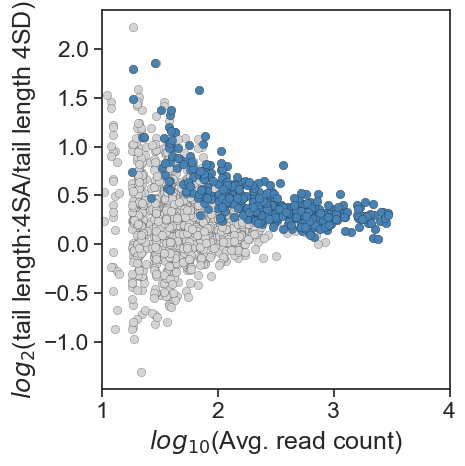

In [31]:
#Is there correlation with gene expression (are the most highly affected those with highest expression)?
f, ax = plt.subplots(1,1, figsize = (5,5))

sns.scatterplot(SA_v_SD_cut, x = np.log10(SA_v_SD_cut["avg_read_count"]), y = "log2FC", color = "lightgrey", edgecolor = "black", linewidth = 0.15)
sns.scatterplot(SA_v_SD_cut.loc[SA_v_SD_cut["FDR"] < 0.05], x = np.log10(SA_v_SD_cut.loc[SA_v_SD_cut["FDR"] < 0.05]["avg_read_count"]), y = "log2FC", color = "steelblue", edgecolor = "black", linewidth = 0.15)

ax.set_xlim(1, 4)
# ax.set_ylim(0,5)
ax.set_xlabel("$log_{10}$(Avg. read count)")
ax.set_ylabel("$log_{2}$(tail length:4SA/tail length 4SD)")

f.tight_layout()

plt.show()

## Differential gene expression

In [3]:
DE_path = "../../../Illumina_preprocess/results/DESeq2/"

In [5]:
#Load in the previously generated dataframes 
DE_EV_WT = pd.read_csv(DE_path + "Diff_exp_resdf_EV_WT.txt", sep = " ").dropna()
DE_EV_WT = DE_EV_WT.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_WT_4SA = pd.read_csv(DE_path + "Diff_exp_resdf_WT_4SA.txt", sep = " ").dropna()
DE_WT_4SA = DE_WT_4SA.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_WT_4SD = pd.read_csv(DE_path + "Diff_exp_resdf_WT_4SD.txt", sep = " ").dropna()
DE_WT_4SD = DE_WT_4SD.rename(columns={"row": "gene_id", "symbol": "gene_name"})

DE_4SA_4SD = pd.read_csv(DE_path + "Diff_exp_resdf_4SA_4SD.txt", sep = " ").dropna()
DE_4SA_4SD = DE_4SA_4SD.rename(columns={"row": "gene_id", "symbol": "gene_name"})

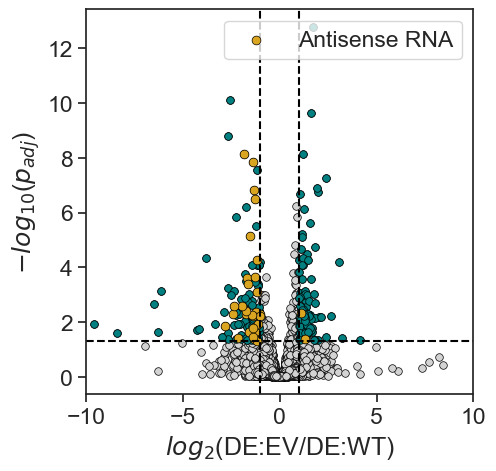

In [9]:
#Set whether to annotate
Annotate = False

#EV vs WT
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_EV_WT.loc[(DE_EV_WT["log2FoldChange"] >= 1) & (DE_EV_WT["padj"] <= 0.05)]
downreg = DE_EV_WT.loc[(DE_EV_WT["log2FoldChange"] <= -1) & (DE_EV_WT["padj"] <= 0.05)]

sns.scatterplot(data = DE_EV_WT, x = "log2FoldChange", y = -np.log10(DE_EV_WT["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)

#Label antisense RNAs
sns.scatterplot(data = upreg.loc[upreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(upreg.loc[upreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5, label = "Antisense RNA")
sns.scatterplot(data = downreg.loc[downreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(downreg.loc[downreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_xlabel("$log_{2}$(DE:EV/DE:WT)")
ax.set_ylabel("$-log_{10}$($p_{adj}$)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 8) 

plt.show()

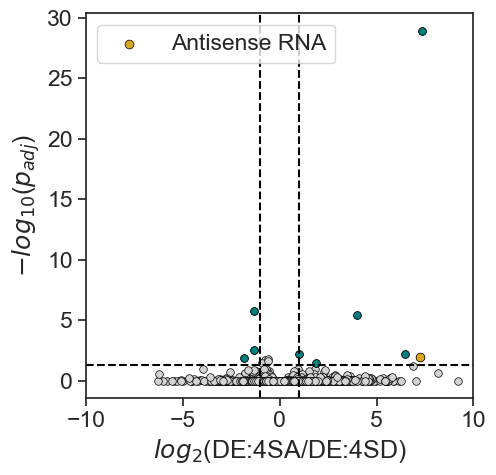

In [14]:
#Set whether to annotate
Annotate = False

#4SA vs 4SD
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = DE_4SA_4SD.loc[(DE_4SA_4SD["log2FoldChange"] >= 1) & (DE_4SA_4SD["padj"] <= 0.05)]
downreg = DE_4SA_4SD.loc[(DE_4SA_4SD["log2FoldChange"] <= -1) & (DE_4SA_4SD["padj"] <= 0.05)]

sns.scatterplot(data = DE_4SA_4SD, x = "log2FoldChange", y = -np.log10(DE_4SA_4SD["padj"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = "log2FoldChange", y = -np.log10(upreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = "log2FoldChange", y = -np.log10(downreg["padj"]), s = 30, alpha = 1, color = "teal", edgecolor = "black", linewidth = 0.5)

#Label antisense RNAs
sns.scatterplot(data = upreg.loc[upreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(upreg.loc[upreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5, label = "Antisense RNA")
sns.scatterplot(data = downreg.loc[downreg.type == "antisense"], x = "log2FoldChange", y = -np.log10(downreg.loc[downreg.type == "antisense"]["padj"]), s = 40, alpha = 1, color = "goldenrod", edgecolor = "black", linewidth = 0.5)

ax.axvline(-1, color = "black", linestyle = "--")
ax.axvline(1, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_xlabel("$log_{2}$(DE:4SA/DE:4SD)")
ax.set_ylabel("$-log_{10}$($p_{adj}$)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["gene_name"][i], ((upreg["log2FoldChange"][i]), (-np.log10(upreg["padj"][i]) + 0.2)), fontsize = 12) 

    for i in downreg.index: 
        plt.annotate(downreg["gene_name"][i], ((downreg["log2FoldChange"][i] - 5), (-np.log10(downreg["padj"][i]) + 0.2)), fontsize = 12) 
        
plt.show()